# TM2 - Corrélation, régression linéaire

# Partie I - Corrélation, régression linéaire

<div class="alert alert-block alert-warning">
Dans cette partie, nous allons étudier la corrélation entre deux variables et la régression linéaire.
</div>
<div class="alert alert-block alert-warning">
Voici le plan :
    <ol>
        <li>Chargement de données à partir d'un fichier</li>
        <li>Visualisation d'un nuage de points</li>
        <li>Calcul d'une covariance et d'un coefficient de corrélation linéaire</li>
        <li>Visualiser une droite</li>
        <li>Moindres carrés</li>
        <li>Ajustement</li>
        <li>Traitement des deux autres variables
    </ol>
</div>

<div class="alert alert-block alert-info">
Tout d'abord, exécuter la boite ci-dessous pour importer les bibliothèques nécessaires.
</div>

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

# Pour pouvoir utiliser des données depuis drive :
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1 - Chargement de données à partir d'un fichier

<div class="alert alert-block alert-warning">
Les données nécessaires à ce TME sont stockées dans le fichier <code>advertising.csv</code> qui se présente ainsi :
<pre>
TV,Radio,Newspaper,Sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,12
151.5,41.3,58.5,16.5
...
</pre>
    Il contient quatre colonnes. Les trois premières sont une mesure de la quantité de publicité diffusée respectivement à la télévision, à la radio et dans les journaux. La dernière colonne mesure les ventes.
    <br/><em>Source : <a href="https://www.kaggle.com/ashydv/advertising-dataset">https://www.kaggle.com/ashydv/advertising-dataset</a></em>
</div>
<div class="alert alert-block alert-info">
    Q1.1 - Charger les données du fichier dans une variable <code>data_pub</code> à l'aide de la fonction <code>pd.read_csv('drive/MyDrive/Classroom/Introduction à la Data Science STS1/nom_de_fichier.csv')</code>.
</div>

In [3]:
df = pd.read_csv('/content/advertising - advertising.csv')

<div class="alert alert-block alert-info">
    Q1.2 - Définir la variable <code>tv</code> pour qu'elle contienne le vecteur NumPy de la colonne <code>'TV'</code>.
</div>

In [56]:
tv = np.array(df["TV"])
radio = np.array(df["Radio"])
newspaper = np.array(df["Newspaper"])

<div class="alert alert-block alert-info">
    Q1.3 - Définir la variable <code>ventes</code> correspondant à cette série de données.
</div>

In [5]:
ventes = np.array(df["Sales"])

## 2 - Visualisation d'un nuage de points
<div class="alert alert-block alert-warning">
    Dans la partie précédente, vous devez avoir défini les deux séries de données <code>tv</code> et <code>ventes</code> que nous allons visualiser.
</div>

<div class="alert alert-block alert-info">
Q2.1 - Écrire la définition de la fonction <code>fig_nuage</code> qui prend en paramètres deux vecteurs de nombres <code>x</code> et <code>y</code> de même taille et qui affiche le nuage de points correspondant.
</div>

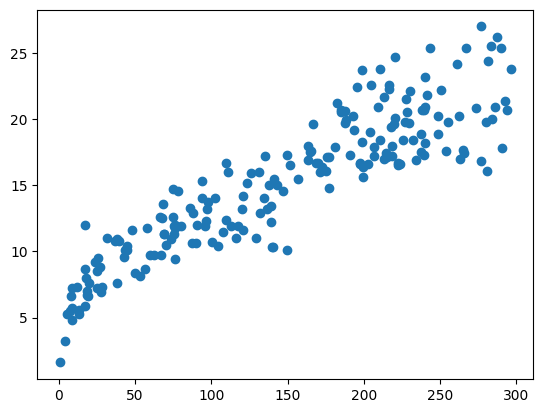

In [6]:
import matplotlib.pyplot as plt

def fig_nuage(x,y) :
    plt.scatter(x,y)
    return
fig_nuage(tv,ventes)

<div class="alert alert-block alert-info">
    Q2.2 - Appliquer la fonction <code>fig_nuage</code> pour visualiser les ventes en fonction de la publicité à la télévision.
</div>

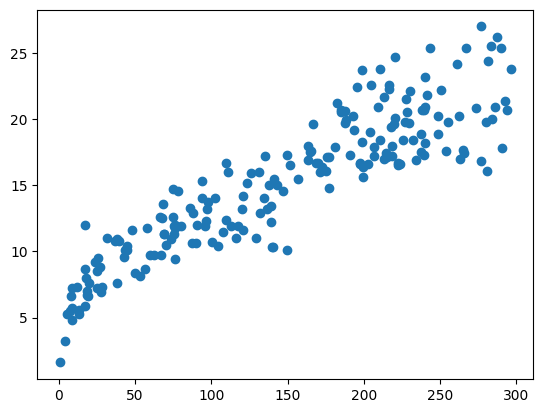

In [7]:
import matplotlib.pyplot as plt

def fig_nuage(tv,ventes) :
    plt.scatter(tv,ventes)
    return

fig_nuage(tv,ventes)

***Commentaire = Le graphique, qui est un nuage de points, nous montre l'évolution entre dépenses en publicité à la télévision (tv) et ventes, ainsi que la corrélation entre les deux. Lorsque les dépenses en publicité évoluent, les ventes augmentent. C'est une tendance croissante, où presque tous les points sont quasi alignés, montrant la relation et le lien entre ces deux variables (tv et ventes).***

## 3 - Calcul d'une covariance et d'un coefficient de corrélation linéaire

<div class="alert alert-block alert-info">
    Q3.1 - Calculer la moyenne de la variable <code>tv</code>.
</div>

In [8]:
def avg(tv):

 a=sum(tv)/len(tv)
 return a

avg(tv)


147.0425

<div class="alert alert-block alert-warning">
Dans la boite précédente, vous devriez obtenir une valeur très proche de :
<pre>
147.0425
</pre>
</div>

<div class="alert alert-block alert-info">
    Q3.2 - Calculer la variance de la variable <code>tv</code>.
</div>

In [9]:
def var(x):
  x_moy = avg(x)
  return sum((x-x_moy)**2)/len(x)

var(tv)

7334.095143750006

<div class="alert alert-block alert-warning">
Dans la boite précédente, vous devriez obtenir une valeur très proche de :
<pre>
7334.09514375
</pre>
</div>

<div class="alert alert-block alert-info">
    Q3.3 - Écrire la fonction <code>cov</code> qui étant données deux vecteurs d'observations <code>x</code> et <code>y</code> de même taille, retourne la covariance de ces deux variables.
    On rappelle la formule de la covariance :
</div>

 $$ cov(\mathbf{x}, \mathbf{y}) = \frac{1}{n} \sum_{i = 1}^{n}(x_i - \bar{\mathbf{x}})(y_i - \bar{\mathbf{y}})$$

In [10]:
def cov(x,y):
  x_moy = avg(x)
  y_moy = avg(y)
  return sum((x-x_moy)*(y-y_moy))/len(x)


<div class="alert alert-block alert-info">
    Q3.4 - Appliquer la fonction <code>cov</code> pour calculer la covariance des variables <code>tv</code> et <code>ventes</code>.
</div>

In [11]:
cov(tv,ventes)

406.78390375

<div class="alert alert-block alert-warning">
Dans la boite précédente, vous devriez obtenir une valeur très proche de :
<pre>
406.78390375000004
</pre>
</div>

<div class="alert alert-block alert-info">
    Q3.5 - Sans utiliser <code>np.corrcoef</code>, écrire une fonction qui étant donné deux vecteurs d'observations <code>x</code> et <code>y</code>, retourne le coefficient de corrélation entre <code>x</code> et <code>y</code>.
    On rappelle la formule du coefficient de corrélation :
</div>

$$ \displaystyle cor(\mathbf{x}, \mathbf{y}) = \frac{cov(\mathbf{x}, \mathbf{y})}{\sqrt{var(\mathbf{x}).var(\mathbf{y})}} $$

In [12]:
def cor(x,y):
  return cov(x,y)/(var(x)*var(y))**0.5

<div class="alert alert-block alert-info">
    Q3.6 - Appliquer la fonction <code>cor</code> pour calculer le coefficient de corrélation linéaire entre les variables <code>tv</code> et <code>ventes</code>.
</div>

In [13]:
cor(tv,ventes)

0.9012079133023307

<div class="alert alert-block alert-warning">
Dans la boite précédente, vous devriez obtenir une valeur très proche de :
<pre>
0.901207913302331
</pre>
</div>

<div class="alert alert-block alert-info">
    Q3.7 - Vérifier le résultat du calcul du coefficient de corrélation linéaire à l'aide de la fonction <code>.corrcoef()</code>
</div>

In [14]:
tv = np.array(df["TV"])
ventes = np.array(df["Sales"])
np.corrcoef(tv,ventes)

array([[1.        , 0.90120791],
       [0.90120791, 1.        ]])

***Commentaire =On peut voir que cette liste contient deux résultats identiques au coéfficients de corrélation linéaire, ce coefficient étant positive donc supérieur à 0, signifie que les deux variables tv et ventes sont fortement lié, quand tv augmente, ventes augmente. (co-variance)***

## 4 - Visualiser une droite

Q4.1 - Complétez la fonction <code>fig_droite</code> qui prend en paramètres un couple de coefficients $(m, p)$ nommé <code>coefs</code> puis <code>xmin</code> et <code>xmax</code> et qui affiche le graphe de la droite $y = mx + p$ pour des abscisses comprises entre $x_{min}$ et $x_{max}$.

In [15]:
def fig_droite (coefs, xmin, xmax):
  y=coefs[0]*xmin+coefs[1]
  y2=coefs[0]*xmax+coefs[1]
  plt.plot([xmin,xmax],[y,y2])
  return


Q4.2 - Appliquer la fonction <code>fig_droite</code> pour visualiser la droite d'équation $y = 3x - 200$ pour les valeurs de $x$ entre $0$ et $300$.

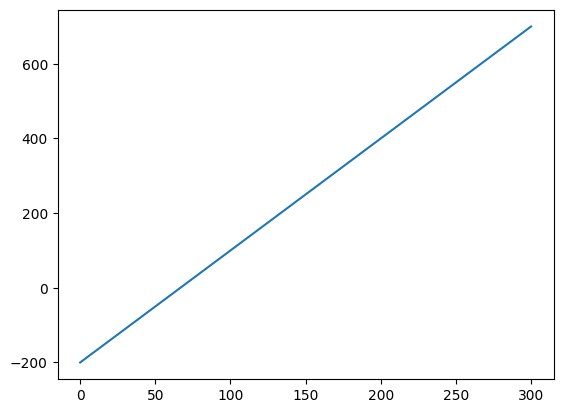

In [16]:
fig_droite((3,-200),0,300)

## 5 - Moindres carrés

Q5.1 - Écrire la définition de la fonction <code>regression_mc</code> qui, étant donné deux vecteurs d'observations <code>x</code> et <code>y</code> de même taille $n$, retourne le couple de coefficients <code>(m, p)</code> de la droite de régression $y = mx + p$ qui minimise le critère des moindres carrés $\sum_{i = 1}^{n} (y_i - (m.x_i + p))^2$.
On rappelle que les coefficients qui minimisent le critère des moindres carrés sont :
$$m^* = \frac{cov(\mathbf{x}, \mathbf{y})}{var(\mathbf{x})} \text{ et } p^* = \bar{\mathbf{y}} - m^*.\bar{\mathbf{x}}$$

In [17]:
def regression_mc(x,y):
  m=cov(x,y)/var(x)
  p=avg(y)-m*avg(x)
  return (m,p)

<div class="alert alert-block alert-info">
Q5.2 - Appliquer la fonction <code>regression_mc</code> pour calculer les coefficients de la régression de <code>ventes</code> en fonction de <code>tv</code>.
</div>

In [18]:
regression_mc(tv,ventes)

(0.055464770469558805, 6.974821488229905)

<div class="alert alert-block alert-warning">
Dans la boite précédente, vous devriez obtenir des valeurs très proches de :
<pre>
(0.05546477046955886, 6.9748214882298925)
</pre>
</div>

<div class="alert alert-block alert-info">
Q5.3 - Écrire la définition de la fonction <code>fig_regression</code> qui, étant donné deux vecteurs d'observations <code>x</code> et <code>y</code> de même taille, génère le  graphique avec le nuage de points et la droite de régression par les moindres carrés en rouge.
</div>

In [19]:
def fig_regression(x,y):
  coefs=regression_mc(x,y)
  fig_nuage(x,y)
  fig_droite(coefs,min(x),max(x))
  return

<div class="alert alert-block alert-info">
Q5.4 - Appliquer la fonction <code>fig_regression</code> pour visualiser le nuage de points de <code>ventes</code> en fonction de <code>tv</code> ainsi que la droite de régression sur le même graphique.
</div>

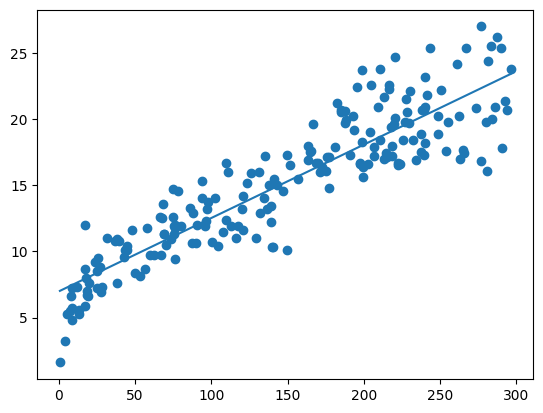

In [20]:
fig_regression(tv,ventes)

***Commentaire = C'est un nuage de point mélange avec une droite de régréssion linéaire ou on observe la relation linéiare entre les dépenses en publciité et les ventes. Cette relation est positive et semble être croissante. Il y a un peu de points qui ne sont pas alignés, mais cela reste globalement alignés. Ainsi, c'est une corrélation positive. Plus les dépenses en publicité augmentent, plus les ventes eux aussi évoluent.***

## 6 - Ajustement

Q6.1 - Écrire un fonction <code>r2</code> qui, étant donné deux vecteurs de mesures <code>x</code> et <code>y</code> mesure la qualité de l'approximation des $y_i = m^* x_i + p$ par :
$$R^2 = \left( cor(p^* \mathbf{1} + m^* \mathbf{x} , \mathbf{y}) \right)^2$$

Utilisez np.ones pour générer un vecteur de 1.

In [21]:
def r2(x,y):
  coefs=regression_mc(x,y)
  return (cor(np.ones(len(x))*coefs[1]+coefs[0]*x,y))**2

<div class="alert alert-block alert-info">
Q6.1 - Appliquer la fonction <code>r2</code> pour mesurer la qualité de l'ajustement de <code>ventes</code> en fonction de <code>tv</code> pour la méthode des moindres carrés.
</div>

In [22]:
r2(ventes,tv)

0.8121757029987405

***Commentaire = Le résultat qu'on a eu est assez bon car il se rapproche de 1 (R² = 0.81), donc la qualité de l'ajustement est bon et la corrélation aussi.***

<div class="alert alert-block alert-warning">
Dans la boite précédente, vous devriez obtenir une valeur très proche de :
<pre>
0.8121757029987419
</pre>
</div>

## 7 - Traitement d'une autre variable

<div class="alert alert-block alert-info">
Q7.1 - Visualiser la droite de régression linéraire pour les ventes en fonction de la publicité à la radio.
</div>

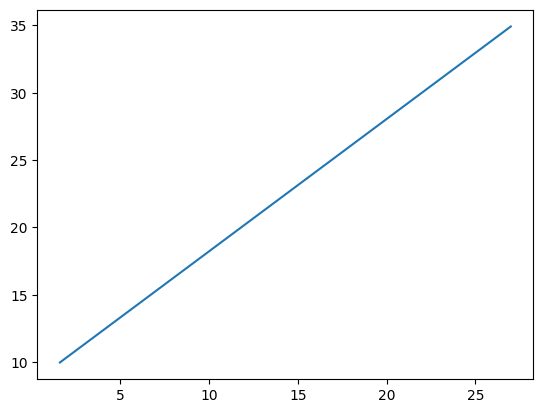

In [23]:
def droite_reg(x,y):
  coefs=regression_mc(x,y)
  fig_droite(coefs,min(x),max(x))
  return
droite_reg(ventes,radio)

***Commentaire = Cette droite montre comment les ventes évoluent en fonction du montant des publicités. Ainsi elle va peremettre de prédire (faire des prédictions) des ventes futures. Ici la pente est positive, donc on comprend que plus les publicités en radio augmentent plus les ventes évoluent. ***

<div class="alert alert-block alert-info">
Q7.2 - Calculer le $R2$ de la régression précédente.
</div>

In [24]:
def r2(x,y):
  coefs=regression_mc(x,y)
  return (cor(np.ones(len(x))*coefs[1]+coefs[0]*x,y))**2
r2(ventes,radio)


0.12224190399478611

***Commentaire = Le Résultat (0,12) est assez faible contrairement à la tv (télévision), le résultat ici est plus proche de 0 que de 1. Cela signifie que la relation entre les ventes et les sales est faible.***

# Partie II - Régression linéaire multiple

Éxécutez les commandes suivantes.

In [25]:
data_pub=pd.read_csv('/content/advertising - advertising.csv')
x = data_pub['TV'] #.to_numpy()
x[:5] # visualisation des 5 premières valeurs

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [26]:
data_pub=pd.read_csv('/content/advertising - advertising.csv')
data_pub.head()
y = data_pub['Sales'] #.to_numpy()
y[:5] # visualisation des 5 premières valeurs

,Sales
0,22.1
1,10.4
2,12.0
3,16.5
4,17.9


## 1 - Moindres carrés avec les matrices


La fonction <code>np.linalg.solve(M, v)</code> permet de déterminer un vecteur $\mathbf{b}$, unique solution lorsqu'elle existe de l'équation matricielle :
$$ \mathbf{M} \mathbf{b} = \mathbf{v} $$
avec $\mathbf{M}$ matrice carrée $n \times n$ et $\mathbf{v}$ un vecteur de taille $n$.
<br/>
Cette fonction utilise des outils mathématiques que vous ne verrez que plus tard dans votre cursus. On va se contenter de dire ici qu'elle "fait le travail".



Q2.1 - Résoudre l'équation matricielle $\mathbf{M}\mathbf{b} = \mathbf{v}$ d'inconnue $\mathbf{b}$ où :
$$
\mathbf{M} = \left[\begin{array}{cc}
  2 & -1 \\
  -4 & 3 \\
\end{array} \right],
\qquad
\mathbf{v} = \left[\begin{array}{c} 1 \\ 7 \end{array} \right],
\qquad
\mathbf{b} = \left[\begin{array}{c} b_0 \\ b_1 \end{array} \right],
$$
Le résultat trouvé doit être l'unique solution du système de deux équations à deux inconnues :
$$
\left\{
  \begin{array}{rcrl}
    2 b_0 & - & b_1 & = 1 \\
    -4 b_0 & + & 3 b_1 & = 7 \\
  \end{array}
\right.
$$

Pour créer un vecteur ou une matrice, utilisez la fonction np.array()


In [27]:
M = np.array([[2,-1],[-4,3]])
v = np.array([1,7])
np.linalg.solve(M, v)

array([5., 9.])

***Commentaire = Le résultat du système de ces deux équations à deux inconnues est = (5,.. ; 9).***


Dans la partie précédente, vous devez avoir défini les deux séries de données <code>x</code> pour la publicité à la télévision et <code>y</code> pour les ventes.


Nous allons voir une méthode différente pour calculer une régression par la méthode des moindres carrés. On retrouvera évidemment la même droite de régression. Cette nouvelle méthode que nous allons voir sera facilement généralisable pour faire de la régression linéaire multiple dans la partie suivante.<br/>

Avec deux séries de données $\mathbf{x}$ et $\mathbf{y}$ puis en définissant :
  $$
\mathbf{X} = [\mathbf{1} \; \mathbf{x}] = \left[\begin{array}{cc}
                    1 & x_1 \\
                    \vdots & \vdots \\
                    1 & x_i \\
                    \vdots & \vdots \\
                    1 & x_n \\
                    \end{array} \right],
\qquad
\mathbf{b} = \left[\begin{array}{c} b_0 \\ b_1 \end{array} \right],
$$
D'après le cours, la régression par la méthode des moindres carrés consiste déterminer $\mathbf{b}$ en minimisant la quantité suivante :
$$
C(a, b) = \|\mathbf{X} \mathbf{b} - \mathbf{y}\|^2$$
On obtient alors la droite de régression :
$$ y = b_0 + b_1x $$


Pour minimiser $C(a, b)$, la matrice $X$ n'étant pas carrée, on peut montrer [hors programme] qu'il suffit de trouver $\mathbf{b}$ solution de l'équation matricielle :
$$
\left(\mathbf{X}^T\mathbf{X}\right) \mathbf{b} = \left(\mathbf{X}^T\mathbf{y}\right)
$$
(multiplication matricielle par $\mathbf{X}^T$ à gauche)



  Q2.2 - Définir la variable <code>X</code> pour qu'elle corresponde à :
$$
  \mathbf{X} = [\mathbf{1} \; \mathbf{x}] = \left[\begin{array}{cc}
                      1 & x_1 \\
                      \vdots & \vdots \\
                      1 & x_i \\
                      \vdots & \vdots \\
                      1 & x_n \\
                      \end{array} \right].
$$
  On utilisera pourra utiliser la fonction <code>np.vstack((A, B))</code> ou <code>np.hstack((A, B))</code> et la transposition.


In [32]:
x=np.array(data_pub["TV"])
X = np.vstack((np.ones(len(x)),x)).T
print(x)

[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  38.   44.7 280.7 121.  197.6 171.3 187.8   4.1
  93.9 149.8  11.7 131.7 172.5  85.7 188.4 163.5 11

<div class="alert alert-block alert-warning">
    Vous devez obtenir :
    <code>
array([[  1. , 230.1],
       [  1. ,  44.5],
       [  1. ,  17.2],
       [  1. , 151.5],
       [  1. , 180.8],
        ...         ])</code>
 </div>


Q2.3 - Calculer $\left(\mathbf{X}^T\mathbf{y}\right)$. Vous devez obtenir un vecteur de taille 2.


In [33]:
x=np.array(data_pub["TV"])
y=np.array(data_pub["Sales"])
X = np.vstack((np.ones(len(x)),x)).T
np.dot(X.T,y)

array([  3026.1 , 526322.09])


Q2.4 - Calculer $\left(\mathbf{X}^T\mathbf{X}\right)$. Vous devez obtenir une matrice $2 \times 2$.

In [34]:
x=np.array(data_pub["TV"])
y=np.array(data_pub["Sales"])
X = np.vstack((np.ones(len(x)),x)).T
np.dot(X.T,X)

array([[2.00000000e+02, 2.94085000e+04],
       [2.94085000e+04, 5.79111839e+06]])


Q2.5 - Écrire la définition de la fonction <code>regression_mc</code> qui, étant donné deux séries de nombres <code>x</code> et <code>y</code>, retourne le vecteur $\mathbf{b}$ qui minimise :
$$
\|\mathbf{X} \mathbf{b} - \mathbf{y} \|^2.
$$
c'est-à-dire la solution de l'équation matricielle :
$$
\left(\mathbf{X}^T\mathbf{X}\right) \mathbf{b} = \left(\mathbf{X}^T\mathbf{y}\right)
$$
avec
$$
\mathbf{X} = [\mathbf{1} \; \mathbf{x}] = \left[\begin{array}{cc}
                    1 & x_1 \\
                    \vdots & \vdots \\
                    1 & x_i \\
                    \vdots & \vdots \\
                    1 & x_n \\
                    \end{array} \right].
$$
On utilisera la fonction <code>np.linalg.solve</code> vue plus haut.


In [36]:
def regression_mc(x,y):
  X = np.vstack((np.ones(len(x)),x)).T
  return np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))

<div class="alert alert-block alert-info">
Q2.6 - Appliquer la fonction <code>regression_mc</code> pour calculer les coefficients de la régression des ventes en fonction de la publicité à la télévision.
</div>

In [43]:
regression_mc(tv,ventes)

array([6.97482149, 0.05546477])

<div class="alert alert-block alert-warning">
    Vous devez retrouver le résultat du TME précédent, à savoir :
    <code>
array([6.97482149, 0.05546477])
</code>
    qui correspond à la droite d'équation : $$y = 6.97482149 + 0.05546477 x$$
 </div>

## 3 - Tracé du résultat

<div class="alert alert-block alert-info">
Q3.1 - Écrire la définition de la fonction <code>fig_regression</code> qui, étant donné deux vecteurs d'observations <code>x</code> et <code>y</code> de même taille, génère le  graphique avec le nuage de points et la droite de régression par les moindres carrés en rouge.
</div>

In [49]:
def fig_regression(x,y):
  coefs=regression_mc(x,y)
  fig_nuage(x,y)
  fig_droite(coefs,min(x),max(x))
  return

<div class="alert alert-block alert-info">
Q3.2 - Appliquer la fonction <code>fig_regression</code> pour visualiser le nuage de points des ventes en fonction de la publicité à la télévision ainsi que la droite de régression sur le même graphique.
</div>

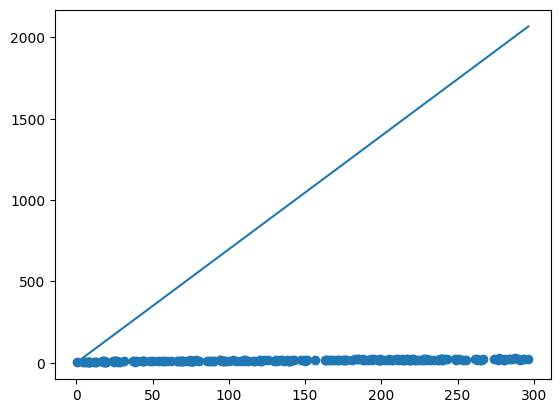

In [52]:
x=np.array(data_pub["TV"])
y=np.array(data_pub["Sales"])
fig_regression(x,y)

***Commentaire = Le graphique montre une évolution constante et une corréaltion positive entre les ventes et la publicité télévisé concernant la droite de régression. Il y a je crois un problème sur le nuage de point que j'ai construit. Il me semble assez faible sur l'axe des ordonnées.***

## 4 - Régression linéaire multiple

<div class="alert alert-block alert-warning">
Dans cette partie, nous allons utiliser exactement la même méthode que précédemment pour réaliser une régression linéaire multiple.
<br/>Cette méthode permet de minimiser le critère des moindres carrés pour la régression linéaire multiple vu en cours. Cependant, la démonstration de ce résultat dépasse le cadre de ce cours.
    
Nous allons donc rechercher $\mathbf{\tilde{y}} = b_0 + b_1 \mathbf{x_{tv}} + b_2 \mathbf{x_{radio}} + b_3 \mathbf{x_{newspaper}}$ où $\mathbf{\tilde{y}}\approx \mathbf{y}$ au sens des moindres carrés.
<div>

<div class="alert alert-block alert-info">
    Q4.1 - Extraire dans une variable <code>Xmul</code> les trois colonnes <code>'TV'</code>, <code>'Radio'</code> et <code>'Newspaper'</code><!-- dans un tableau <code>numpy</code> à l'aide de la méthode <code>.to_numpy()</code>-->.
</div>

In [53]:
Xmul=np.array(data_pub[["TV","Radio","Newspaper"]])
Xmul

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

<div class="alert alert-block alert-info">
Q4.2 - Appliquer la fonction <code>regression_mc</code> pour calculer les coefficients $b$ de la régression des ventes en fonction de la publicité à la télévision, à la radio et dans les journaux.
</div>

In [65]:
regression_mc(tv,ventes)
regression_mc(radio,ventes)
regression_mc(newspaper,ventes)

array([13.95954865,  0.038324  ])

<div class="alert alert-block alert-warning">
Vous devez trouver :
<code>
array([4.62512408e+00, 5.44457803e-02, 1.07001228e-01, 3.35657922e-04])
</code>
</div>

Q4.3 - Appliquer la fonction <code>fig_regression_mult</code> pour visualiser le nuage de points des ventes en fonction de $\mathbf{\tilde{y}}$.


In [70]:
def fig_regression_mult(x,y):
  coefs=regression_mc(x,y)
  fig_nuage(x,y)
  fig_droite(coefs,min(x),max(x))
  return


<div class="alert alert-block alert-info">
Q4.4 - Calculer le $R^2$ de cette régression multiple.
</div>

In [72]:
r2(x,y)

0.8121757029987426